<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Graphics-Functions-and-Tools-Python/blob/master/Scatterplot_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [56]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Projects-with-Python/main/dataset/Tempo_BH.xlsx'
dados = pd.read_excel( url )

In [50]:
dados['CHOVEU' ] = ''

dados.reset_index()

for i in range( len( dados ) ):
  dados.loc[i, 'PRESSAO_ATM_MED' ]         = ( ( dados.loc[i, 'PRESSAO_ATM_MAX' ]            + dados.loc[ i, 'PRESSAO_ATM_MIN' ] ) / 2 )
  dados.loc[i, 'UMIDADE_RELATIVA_MED' ]    = ( ( dados.loc[i, 'UMIDADE_RELATIVA' ]           + dados.loc[ i, 'UMIDADE_RELATIVA_MINIMA' ] ) / 2 )
  dados.loc[i, 'TEMPERATURA_ORVALHO_MED' ] = ( ( dados.loc[i, 'TEMPERATURA_ORVALHO_MAXIMA' ] + dados.loc[ i, 'TEMPERATURA_ORVALHO_MINIMA' ] ) / 2 )

  if ( dados.loc[i, 'PRECIPITACAO_TOTAL'] > 0 ):
    dados.loc[i, 'CHOVEU'] = 'SIM'
  else:
    dados.loc[i, 'CHOVEU'] = 'NÃO'

In [ ]:
print( dados.head() )

In [ ]:
df = dados[ ( dados['PRECIPITACAO_TOTAL']         >= 0     ) &
            ( dados['TEMPERATURA_MAXIMA']         >  0     ) &
            ( dados['TEMPERATURA_ORVALHO_MED']    >  0     ) &
            ( dados['UMIDADE_RELATIVA']           >  0     ) &
            ( dados['UMIDADE_RELATIVA_MED']       >  0     ) &
            ( dados['PRESSAO_ATM_MED']            >  0     ) &
            ( dados['VENTO_VELOCIDADE']           >  0     ) ]

X_campos = ['PRECIPITACAO_TOTAL', 
            'TEMPERATURA_MAXIMA', 
            'UMIDADE_RELATIVA',
            'VENTO_VELOCIDADE',
            'PRESSAO_ATM_MED',
            'UMIDADE_RELATIVA_MED',
            'TEMPERATURA_ORVALHO_MED',
            'CHOVEU']

df = df[X_campos]

print(df)

<Figure size 1440x1440 with 0 Axes>

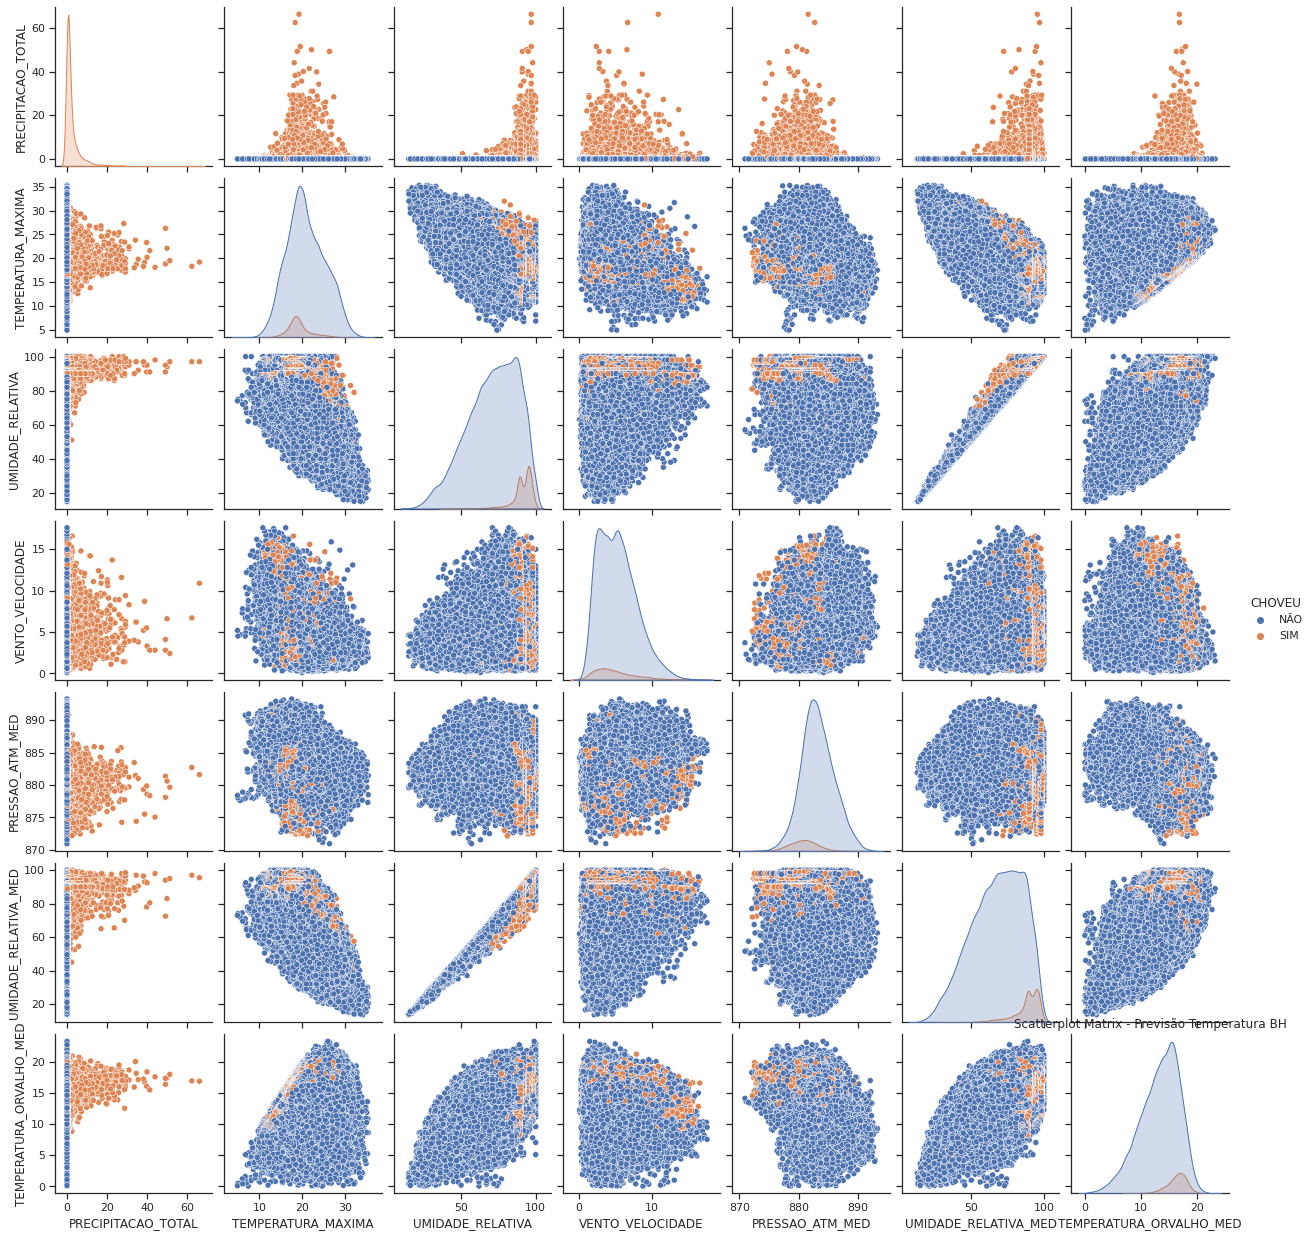

In [58]:
sns.set_theme(style='ticks')
sns.pairplot(df, hue="CHOVEU")

In [62]:
df['CHOVEU'].value_counts()

NÃO    67493
SIM     4387
Name: CHOVEU, dtype: int64